<div id='#top'><h1><font color='#154360'>Residential Rentals in</font> <font color='#CD6155'>New York City</font></h1></div>

Using data from <a href='https://streeteasy.com/' target='_blank'>StreetEasy</a>, a New York City real estate search engine owned by Zillow, Inc., we'll be looking at apartment rentals in the three boroughs of Manhattan, Queens and Brooklyn. 

<p>After importing and inspecting our data, we'll do some exploratory data analysis and visualize our dataset. Then, we'll build a <a href='#model'>linear regression machine learning model</a> to predict rent prices based on features for apartments in the borough of Manhattan.</p>

<p>As an <a href='#example'>example</a>, we'll predict the price of an apartment with the name of <i>Overlook</i> that is a 620 ft<sup>2</sup>, 1 bed/bath apartment in a 98 year old building. Additionally, Overlook has a 16 minute walk to the closest subway, is on the first floor, and has a washer/dryer, a dishwasher, as well as a patio.</p>

<mark>This notebook is geared towards people familiar with Python and Pandas</mark>, as I don't explain the code in detail.  However, <mark>the graphs and plots can be understood by anyone, so you don't need a technical background to generally follow along</mark>. For anyone reading this who might not be familiar with Python, I suggest <a href='#results'>skipping to the <font color='red'>Results</font> section</a> at the bottom of this notebook. 

In [1]:
# Import the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# This may be necessary for someone running this notebook with an older version of Pandas or Jupyter:
pd.set_option('display.max_columns', None)
# Turns off filtering warnings in the notebook:
import warnings
warnings.filterwarnings('ignore')
# Allows us to print markdown from code cells:
from IPython.display import Markdown as md

In [3]:
# Set the stylesheet to FiveThirtyEight:
plt.style.use('fivethirtyeight')
# Define our own colors:
colors1 = ['#4895EF', '#FCA311', '#E5383B']
colors2 = ['#4895EF', '#E09F3E', '#F94144']

In [4]:
# Read the data into a dataframe and look at first five rows:
df = pd.read_csv('data/streeteasy.csv')
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


As we can see from the head of our dataframe, there are a lot of one-hot encoded (OHE) features. 

In [5]:
# Get an overview of the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         5000 non-null   int64  
 1   building_id       5000 non-null   int64  
 2   rent              5000 non-null   int64  
 3   bedrooms          5000 non-null   float64
 4   bathrooms         5000 non-null   int64  
 5   size_sqft         5000 non-null   int64  
 6   min_to_subway     5000 non-null   int64  
 7   floor             5000 non-null   float64
 8   building_age_yrs  5000 non-null   int64  
 9   no_fee            5000 non-null   int64  
 10  has_roofdeck      5000 non-null   int64  
 11  has_washer_dryer  5000 non-null   int64  
 12  has_doorman       5000 non-null   int64  
 13  has_elevator      5000 non-null   int64  
 14  has_dishwasher    5000 non-null   int64  
 15  has_patio         5000 non-null   int64  
 16  has_gym           5000 non-null   int64  


I'm going to change the <code>neighborhood</code>, <code>submarket</code> and <code>borough</code> columns to the <font color='#CD6155'>string</font> dtype:

In [6]:
df[['neighborhood', 'submarket', 'borough']] = df[['neighborhood', 'submarket', 'borough']].astype('string')

--------------------

## <font color='#CD6155'>Distribution</font> <font color='#154360'>of Rent Prices:</font>

<p>Most of the rental prices in this dataset are between \$2,500-\$5,000, although there are a lot of high cost outliers:</p> 

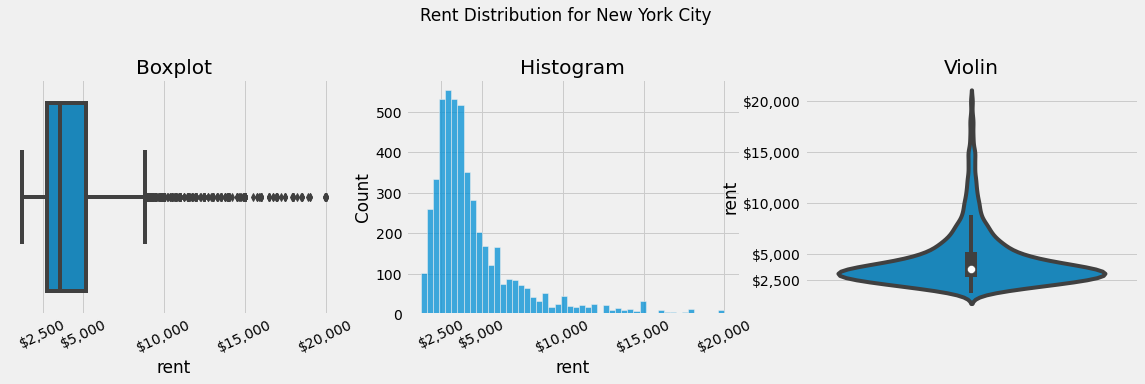

In [7]:
## Plot the distribution of rent prices three different ways.
# Create two lists, one for axis-ticks and the other for axis-labels:
labels_rent = ['$2,500', '$5,000', '$10,000', '$15,000', '$20,000']
ticks_rent = [2500, 5000, 10000, 15000, 20000]
# Create the figure, and the axes (subplots): 1 row, 3 columns:
fig, ax = plt.subplots(1, 3, figsize=(17, 5))
# Figure title:
fig.suptitle('Rent Distribution for New York City')
# Tight layout:
fig.tight_layout(pad=2)
# Boxplot:
sns.boxplot(df['rent'], ax=ax[0])
# Histogram:
sns.histplot(x='rent', data=df, bins=50, ax=ax[1])
# Violin plot:
sns.violinplot(y=df['rent'], ax=ax[2])
# Set the title for each axes:
ax[0].set_title('Boxplot')
ax[1].set_title('Histogram')
ax[2].set_title('Violin')
# Set the ticks for each axes (x-axis for 2 axes, y-axis for 1 axes):
ax[0].set_xticks(ticks_rent)
ax[1].set_xticks(ticks_rent)
ax[2].set_yticks(ticks_rent)
# set the tick labels for each axes (x-axis for 2 axes, y-axis for 1 axes):
ax[0].set_xticklabels(labels_rent, rotation=25)
ax[1].set_xticklabels(labels_rent, rotation=25)
ax[2].set_yticklabels(labels_rent)
plt.show()

------------------------------

<h2><font color='#CD6155'>Central Tendency</font> <font color='#154360'>of Rent Prices</font></h2>

In [8]:
# Get quartiles of the rent variable:
df['rent'].describe()

count     5000.000000
mean      4536.920800
std       2929.838953
min       1250.000000
25%       2750.000000
50%       3600.000000
75%       5200.000000
max      20000.000000
Name: rent, dtype: float64

In [9]:
all_boroughs_min = df['rent'].min()
all_boroughs_max = df['rent'].max()
all_boroughs_avg = df.rent.mean()
all_boroughs_median = df.rent.median()
all_boroughs_std = df['rent'].std()
all_boroughs_mode = df['rent'].mode()

print(f'Mean:   ---------------   {all_boroughs_avg}')
print(f'Median:   -------------   {all_boroughs_median}')
print(f'Standard Deviation:   -   {all_boroughs_std}')
print(f'Rent Min:    ----------   {all_boroughs_min}')
print(f'Rent Max:    ----------   {all_boroughs_max}')

Mean:   ---------------   4536.9208
Median:   -------------   3600.0
Standard Deviation:   -   2929.83895314839
Rent Min:    ----------   1250
Rent Max:    ----------   20000


Our dataset is unimodal and right-skewed on rent with many outliers on the expensive end:

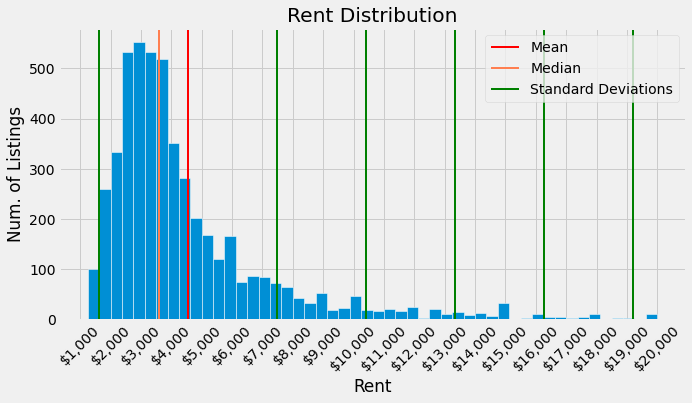

In [10]:
## Plot rent distribution showing central tendency
# Create two lists, one for axes ticks, one for tick labels:
xticks = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 
          8000, 9000, 10000, 11000, 12000, 13000, 
          14000, 15000, 16000, 17000, 18000, 19000, 20000]
xlabels = ['$1,000', '$2,000', '$3,000', '$4,000', '$5,000', '$6,000', '$7,000', 
           '$8,000', '$9,000', '$10,000', '$11,000', '$12,000', '$13,000', '$14,000', 
           '$15,000', '$16,000', '$17,000', '$18,000', '$19,000', '$20,000']
# figure and axes, and set figure size:
fig, ax = plt.subplots(figsize=(10,5))
# Histogram:
ax.hist(df['rent'], bins=50, edgecolor='white')
# Mean:
ax.axvline(df.rent.mean(), color='red', linewidth=2, label='Mean')
# Median:
ax.axvline(df.rent.median(), color='coral', linewidth=2, label='Median')
# Standard deviations;
ax.axvline(df.rent.mean() + df.rent.std(), color='green', linewidth=2, label='Standard Deviations')
ax.axvline(df.rent.mean() + df.rent.std()*2, color='green', linewidth=2)
ax.axvline(df.rent.mean() + df.rent.std()*3, color='green', linewidth=2)
ax.axvline(df.rent.mean() + df.rent.std()*4, color='green', linewidth=2)
ax.axvline(df.rent.mean() + df.rent.std()*5, color='green', linewidth=2)
ax.axvline(df.rent.mean() - df.rent.std(), color='green', linewidth=2)
# Set the x-axis ticks and tick labels:
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels, rotation=45)
# Legend:
ax.legend()
# x-axis label:
plt.xlabel('Rent')
# y-axis label:
plt.ylabel('Num. of Listings')
# figure title
plt.title('Rent Distribution')
plt.show()

--------------------------

<h2><font color='#154360'>The Boroughs</font></h2>

As we can see, there are a lot more listings for apartments in Manhatan than for the other two boroughs of Queens and Brooklyn:

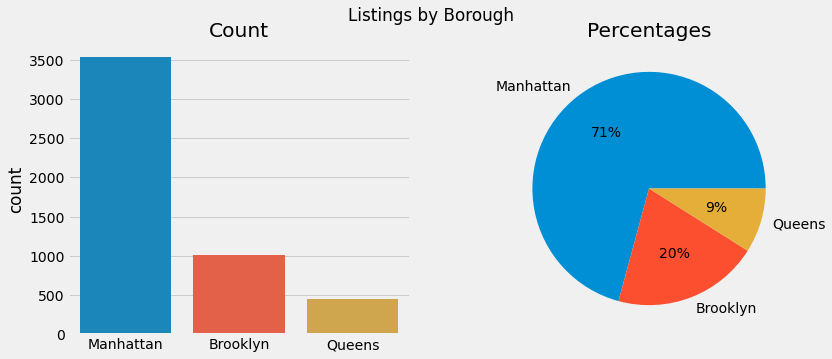

In [11]:
## Plot number of listings per borough
# Create list of bouroughs to be used as axes labels:
borough_labels = ["Manhattan", "Brooklyn", "Queens"]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
# Create figure title:
fig.suptitle('Listings by Borough')
# Generate pie chart of boroughs
ax[1].pie(df.borough.value_counts(), labels=borough_labels, autopct='%.0f%%')
sns.countplot(data=df, x='borough', order=df['borough'].value_counts().index, ax=ax[0])
ax[0].set_title('Count')
ax[1].set_title('Percentages')
ax[0].set_xlabel('')
plt.show() 

--------------------------

Next, we'll look the rent distributions per borough:

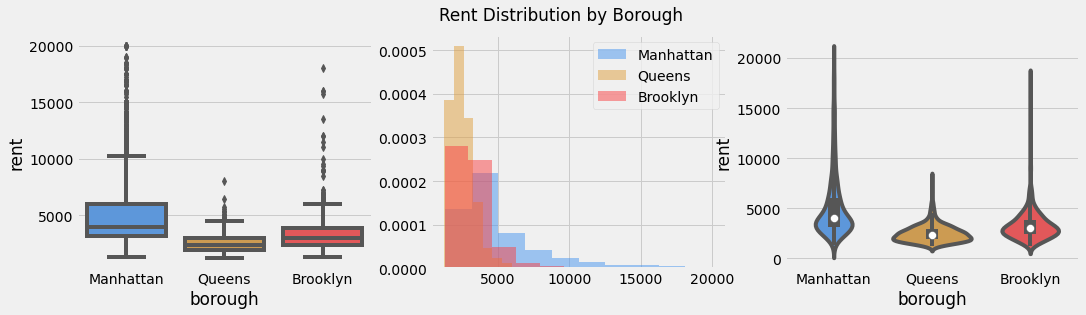

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Rent Distribution by Borough')
# Boxplot:
sns.boxplot(x='borough', y='rent', data=df, palette=colors2, ax=axs[0])
# Histogram
axs[1].hist(df.rent[df.borough=='Manhattan'], label='Manhattan', color=colors2[0], density=True, stacked=True, alpha=.5)
axs[1].hist(df.rent[df.borough=='Queens'], label='Queens', color=colors2[1], density=True, stacked=True, alpha=.5)
axs[1].hist(df.rent[df.borough=='Brooklyn'], label='Brooklyn', color=colors2[2], density=True, stacked=True, alpha=.5)
axs[1].legend()
sns.violinplot(data=df, x='borough', y='rent', palette=colors2, ax=axs[2])
plt.show()

----------------------

We can see that there is a relatively strong correlation between rent and apartment size:

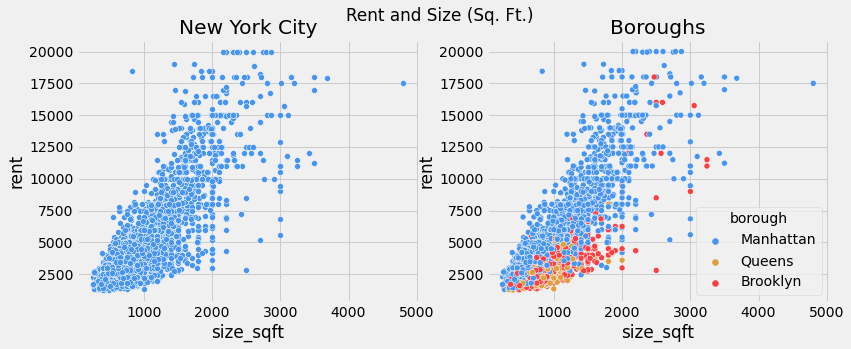

In [14]:
## Scatterplots of rent and apartment size (in sq. ft.)
# Unpack figure and axes, and set figure size:
fig, axs = plt.subplots(1,2, figsize=(12, 4.5))
# Figure title:
fig.suptitle('Rent and Size (Sq. Ft.)')
# First scatterplot, no hue
sns.scatterplot(df.size_sqft, df.rent, color=colors1[0], ax=axs[0])
# Scatterplot with hue for borough
sns.scatterplot(data=df, x='size_sqft', y='rent', hue='borough', palette=colors2, ax=axs[1])
# Set subplot titles:
axs[0].set_title('New York City')
axs[1].set_title('Boroughs')
plt.show()

Next, we'll construct a correlation matrix heat map of apartment features:

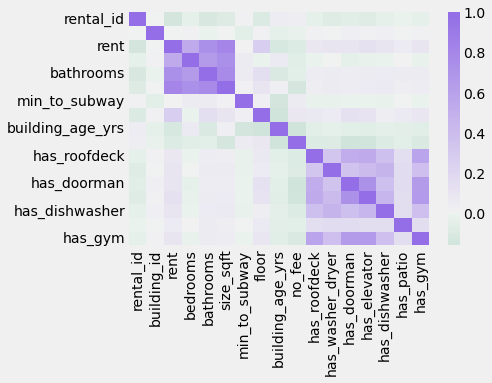

In [15]:
# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
 
# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(df.corr(), center=0, cmap=colors, robust=True)
plt.show()

-------------------------

<div id='manhattan'>
<h2><font color='#154360'>Manhattan Apartments</font></h2></div>

First, let's grab all of the Manhattan listings and put them into a new dataframe:

In [16]:
manhattan = df[df['borough'] == 'Manhattan']
manhattan.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
7,3946,23468975,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,All Downtown,Manhattan


----------------------------------

<div id='#ctm'><h3><font color='#CD6155'>Central Tendency</font> <font color='#154360'>of Manhattan Rent Prices</font></h3></div>

Let's look at the central tendency of rent pricing for the Manhattan listings:

In [17]:
# Central Tendency of rent for Manhattan listings:
mnhtn_avg = manhattan['rent'].mean()
mnhtn_median = manhattan['rent'].median()
mnhtn_std = manhattan['rent'].std()
mnhtn_mode = manhattan['rent'].mode()
mmin = manhattan['rent'].min()
mmax = manhattan['rent'].max()

In [18]:
print(f'Mean:   ---------------   {mnhtn_avg}')
print(f'Median:   -------------   {mnhtn_median}')
print(f'Standard Deviation:  --   {mnhtn_std}')
print(f'Rent Min:    ----------   {mmin}')
print(f'Rent Max:    ----------   {mmax}')

Mean:   ---------------   5138.9403786380335
Median:   -------------   4000.0
Standard Deviation:  --   3162.8247596516667
Rent Min:    ----------   1300
Rent Max:    ----------   20000


In [19]:
# Including quartiles:
manhattan['rent'].describe()

count     3539.000000
mean      5138.940379
std       3162.824760
min       1300.000000
25%       3150.000000
50%       4000.000000
75%       6000.000000
max      20000.000000
Name: rent, dtype: float64

Next, we'll calculate the quartiles for the rent distribution of Manhattan apartment listings:

In [20]:
mrent_q1 = np.quantile(manhattan['rent'], 0.25)
mrent_q2 = np.quantile(manhattan['rent'], 0.50)
mrent_q3 = np.quantile(manhattan['rent'], 0.75)
print(f"25% of listed Manhattan apartments have a rent price of ${mrent_q1} or less.")
print(f"Half of all listed rent prices are ${mrent_q2} or less.")
print(f"25% of listed Manhattan apartments have a rent price of ${mrent_q3} or more.")

25% of listed Manhattan apartments have a rent price of $3150.0 or less.
Half of all listed rent prices are $4000.0 or less.
25% of listed Manhattan apartments have a rent price of $6000.0 or more.


As is the case with the rent distribution for the whole dataset, we can see that our Manhattan subset is unimodal and right-skewed with many outliers: 

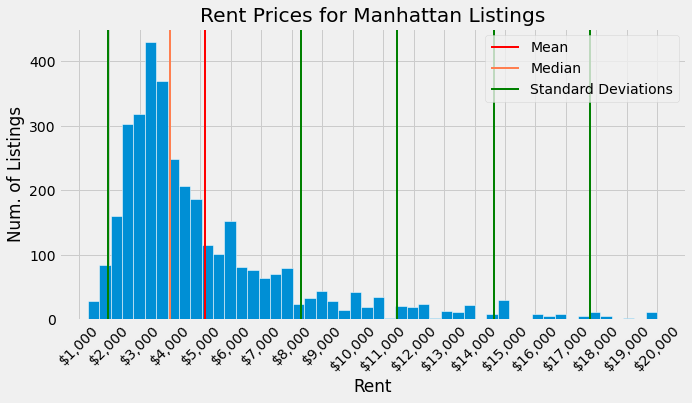

In [21]:
## Histogram for rent prices of the Manhattan listings with central tendency defined
# Create the figure and set the figure size:
plt.figure(figsize=(10,5))
# Create the histogram:
plt.hist(manhattan['rent'], bins=50, edgecolor='white')
# Create the verticle lines for central tendency:
plt.axvline(mnhtn_avg, color='red', linewidth=2, label='Mean')
plt.axvline(mnhtn_median, color='coral', linewidth=2, label='Median')
plt.axvline(mnhtn_avg - mnhtn_std, color='green', linewidth=2, label='Standard Deviations')
plt.axvline(mnhtn_avg + mnhtn_std, color='green', linewidth=2)
plt.axvline(mnhtn_avg + mnhtn_std*2, color='green', linewidth=2)
plt.axvline(mnhtn_avg + mnhtn_std*3, color='green', linewidth=2)
plt.axvline(mnhtn_avg + mnhtn_std*4, color='green', linewidth=2)
# ticks for the x-axis, rotating them 45 degrees:
plt.xticks(xticks, xlabels, rotation=45)
# legend:
plt.legend()
# x-axis label:
plt.xlabel('Rent')
# y-axis label:
plt.ylabel('Num. of Listings')
# Figure title:
plt.title('Rent Prices for Manhattan Listings')
plt.show()

---------------------------

<div id='model'>
<h1><font color='#154360'>Model:</font> <font color='#CD6155'>Multiple Linear Regression</font> <font color='#154360'>- Machine Learning</font></h1></div>

First, I'll split our data in an 80/20 train/test ratio:

In [22]:
# Features:
x = manhattan[
    ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 
     'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 
     'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']
]
# Dependent variable:
y = manhattan[['rent']]

# We need to split the data into a training set and a test or validation set. Here we split it using 80/20 train/test:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

I'll make sure that the shapes of <mark>x</mark> and <mark>y</mark> match each other:

In [23]:
# Check the shapes to verify the proportions:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


<div id='example'>
<p>Next, I create the linear regression model, fit it to the training data, and predict the price of an example apartment called <mark>Overlook</mark>:</p>
</div>

In [24]:
# Create the linear regression model and then fit to training data:
mlr = LinearRegression()
mlr.fit(x_train.values, y_train) 

# We use predict() to pass in the x values to return the predicted y values
y_predict = mlr.predict(x_test.values)

# An example apartment:
overlook_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
# Get the prediction:
predict = mlr.predict(overlook_apartment)
# Print the prediction:
print(f'Predicted rent for Overlook: ${float(predict):.2f}')

Predicted rent for Overlook: $2438.67


Now I'll create a scatterplot to plot the actual rents against the predicted rents:

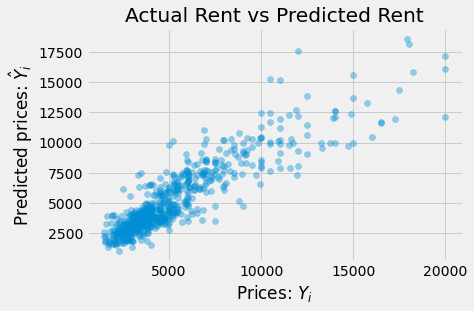

In [25]:
# Create scatter plot:
plt.scatter(y_test, y_predict, alpha=0.4)
# label x-axis as actual prices:
plt.xlabel("Prices: $Y_i$")
# label y-axis as predicted prices:
plt.ylabel("Predicted prices: $\hat{Y}_i$")
# figure title:
plt.title("Actual Rent vs Predicted Rent")
plt.show()

Let's look at our coefficients:

In [26]:
# Coefficients:
mlr.coef_

array([[-3.06234765e+02,  1.15646627e+03,  4.94240206e+00,
        -1.68619875e+01,  2.49148713e+01, -7.67056532e+00,
        -1.64300953e+02, -1.51498858e+01,  1.62174910e+02,
        -2.32460769e+02,  9.15227253e+01,  2.33470620e+01,
        -1.00528049e+02, -7.66885549e-01]])

The intercept:

In [27]:
# Intercept:
mlr.intercept_

array([-399.95349012])

<mark>And now the train and test scores:</mark>

In [28]:
print("Train score:")
print(mlr.score(x_train, y_train))

print("Test score:")
print(mlr.score(x_test, y_test))

Train score:
0.7718947142871946
Test score:
0.8091778244451908


<div id='#residual_abalysis'>Residual Analysis:</div>

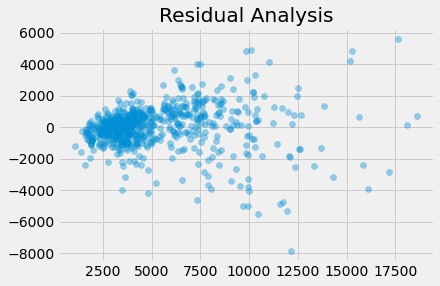

In [29]:
residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')
plt.show()

-------------------------------

<div id='#individual'><h3><font color='#154360'>Plotting Individual Features vs. Rent:</font></h3></div>

<a href='#results'>Click here</a> to skip this part and go directly to the results for our example apartment.

Let's look at each feature individually with rent:

Text(0.5, 1.0, 'Gym')

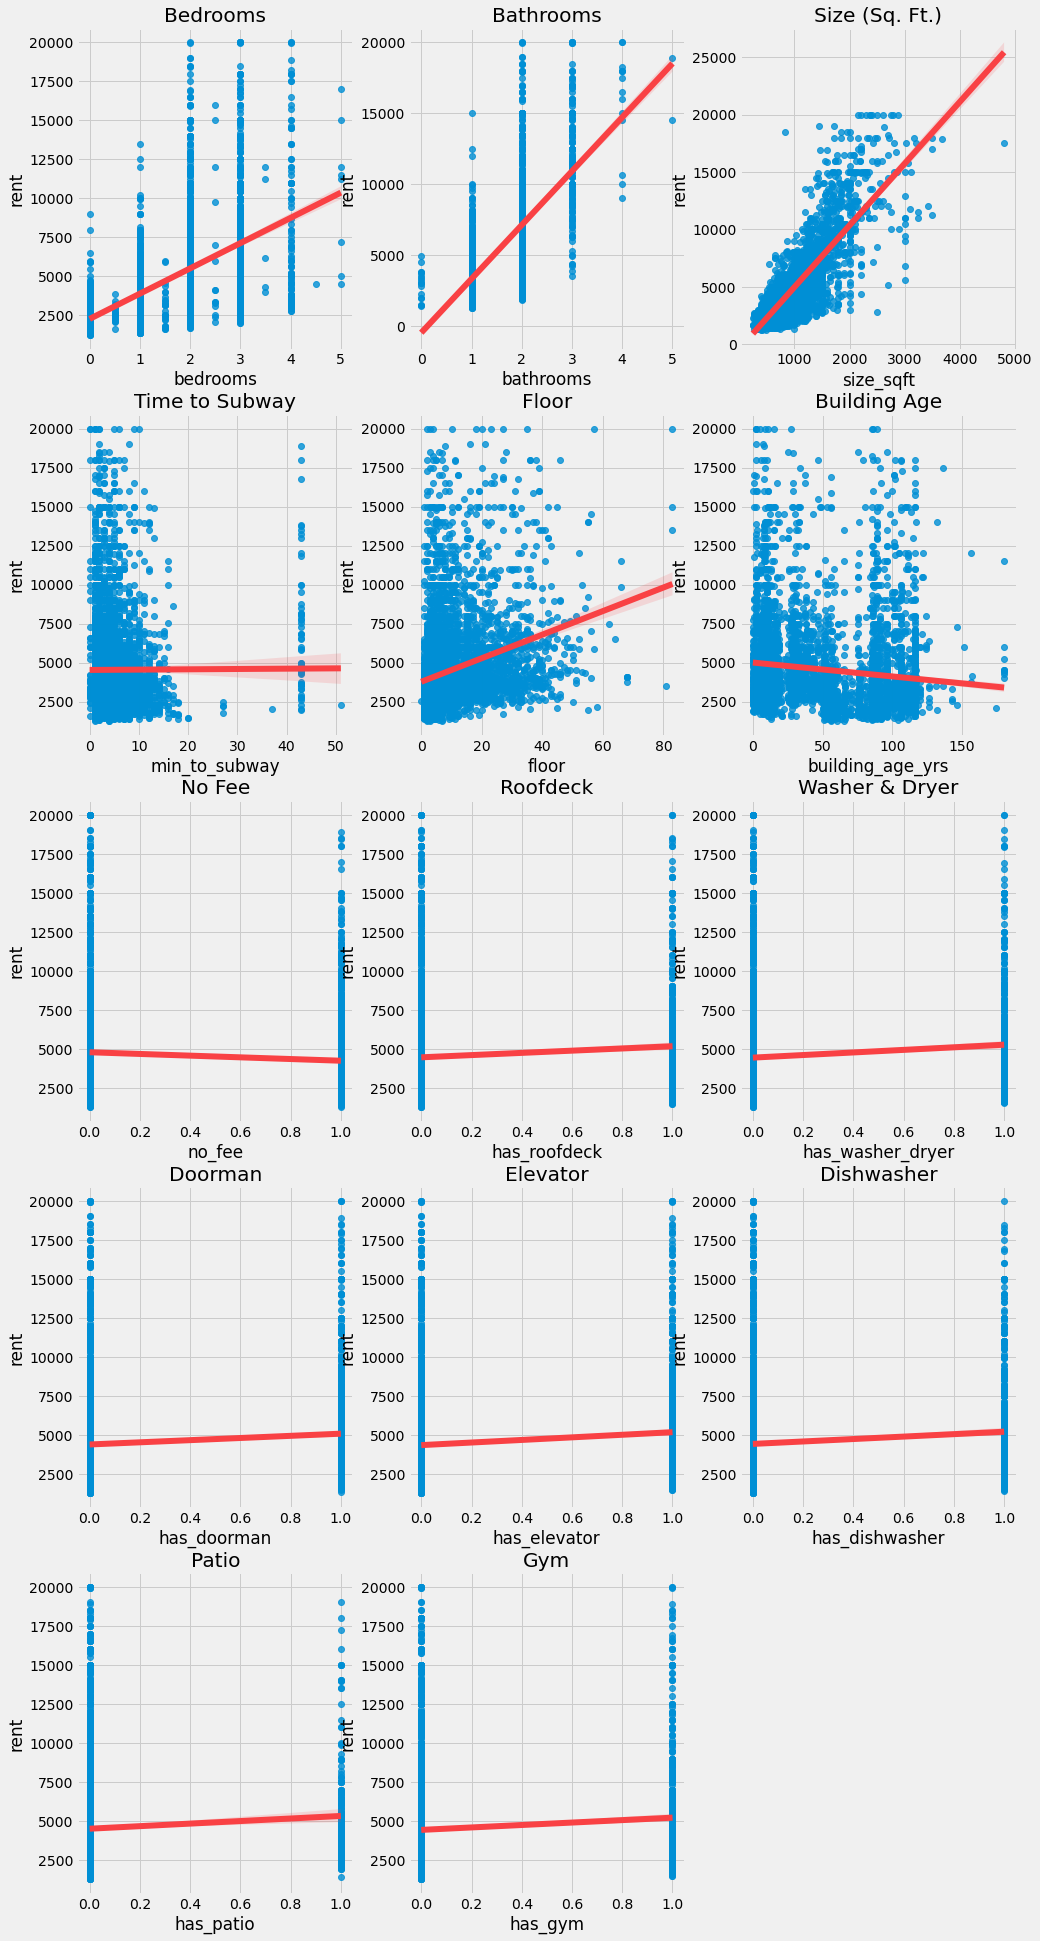

In [30]:
# Create figure and set it's size:
plt.figure(figsize=(15, 32))
# Tight layout
plt.tight_layout()
# Create subplot:
plt.subplot(5, 3, 1)
# Regression plot:
sns.regplot(data=df, x='bedrooms', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Bedrooms')
# Create subplot:
plt.subplot(5, 3, 2)
# Regression plot:
sns.regplot(data=df, x='bathrooms', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Bathrooms')
# Create subplot:
plt.subplot(5, 3, 3)
# Regression plot:
sns.regplot(data=df, x='size_sqft', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Size (Sq. Ft.)')
# Create subplot:
plt.subplot(5, 3, 4)
# Regression plot:
sns.regplot(data=df, x='min_to_subway', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Time to Subway')
# Create subplot:
plt.subplot(5, 3, 5)
# Regression plot:
sns.regplot(data=df, x='floor', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Floor')
# Create subplot:
plt.subplot(5, 3, 6)
# Regression plot:
sns.regplot(data=df, x='building_age_yrs', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Building Age')
# Create subplot:
plt.subplot(5, 3, 7)
# Regression plot:
sns.regplot(data=df, x='no_fee', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('No Fee')
# Create subplot:
plt.subplot(5, 3, 8)
# Regression plot:
sns.regplot(data=df, x='has_roofdeck', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Roofdeck')
# Create subplot:
plt.subplot(5, 3, 9)
# Regression plot:
sns.regplot(data=df, x='has_washer_dryer', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Washer & Dryer')
# Create subplot:
plt.subplot(5, 3, 10)
# Regression plot:
sns.regplot(data=df, x='has_doorman', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Doorman')
# Create subplot:
plt.subplot(5, 3, 11)
# Regression plot:
sns.regplot(data=df, x='has_elevator', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Elevator')
# Create subplot:
plt.subplot(5, 3, 12)
# Regression plot:
sns.regplot(data=df, x='has_dishwasher', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Dishwasher')
# Create subplot:
plt.subplot(5, 3, 13)
# Regression plot:
sns.regplot(data=df, x='has_patio', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Patio')
# Create subplot:
plt.subplot(5, 3, 14)
# Regression plot:
sns.regplot(data=df, x='has_gym', y='rent', line_kws={'color': colors2[2]})
# Title:
plt.title('Gym')

----------------------------------

<div id='results'><h1><font color='#CD6155'>Results</font></h1></div>
Results for our example apartment:

Now, let's go back to the <mark>Overlook</mark> apartment that we predicted the price for. Let's plot that on our histogram of Manhattan Rent prices to see where it falls relative to the prices of the other listings.

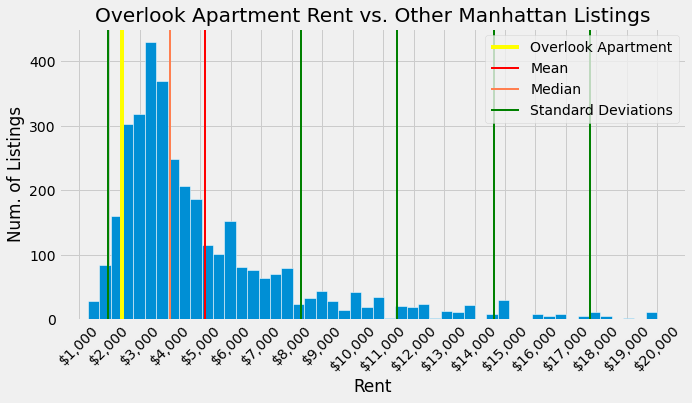

In [31]:
# Create figure and set figure size:
plt.figure(figsize=(10,5))
# Create the histogram:
plt.hist(manhattan['rent'], bins=50, edgecolor='white')
# Plot the line for our example apartment called Overlook:
plt.axvline(x=predict, label='Overlook Apartment', c='yellow')
# Plot the line for the mean:
plt.axvline(mnhtn_avg, color='red', linewidth=2, label='Mean')
# Plot the line for the median:
plt.axvline(mnhtn_median, color='coral', linewidth=2, label='Median')
# Plot the lines for standard deviation:
plt.axvline(mnhtn_avg - mnhtn_std, color='green', linewidth=2, label='Standard Deviations')
plt.axvline(mnhtn_avg + mnhtn_std, color='green', linewidth=2)
plt.axvline(mnhtn_avg + mnhtn_std*2, color='green', linewidth=2)
plt.axvline(mnhtn_avg + mnhtn_std*3, color='green', linewidth=2)
plt.axvline(mnhtn_avg + mnhtn_std*4, color='green', linewidth=2)
# Set the ticks on the x-axis and rotate them by 45 degrees:
plt.xticks(xticks, xlabels, rotation=45)
# Create the legend:
plt.legend()
# Label the x-axis:
plt.xlabel('Rent')
# Label the y-axis:
plt.ylabel('Num. of Listings')
# Set the title:
plt.title('Overlook Apartment Rent vs. Other Manhattan Listings')
plt.show()

The Overlook apartment falls in the cheapest 10% of Manhattan apartments in terms of price:

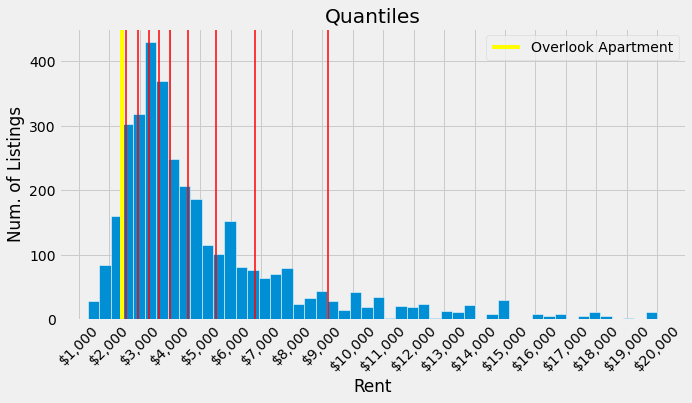

In [32]:
# Create a histogram with quantiles:
# Create the figure and set the figure size:
plt.figure(figsize=(10,5))
# Plot the histogram
plt.hist(manhattan['rent'], bins=50, edgecolor='white')
# Plot the line for our example apartment:
plt.axvline(x=predict, label='Overlook Apartment', c='yellow')
# Create 9 lines separating our distribution into 10 quantile groups:
for i in range(1, 10):
    plt.axvline(x=np.quantile(manhattan['rent'], i/10), color='red', linewidth=1.5)
# Set the ticks on the x-axis and rotate by 45 degrees:
plt.xticks(xticks, xlabels, rotation=45)
# Create the legend:
plt.legend()
# Label the x-axis:
plt.xlabel('Rent')
# Label the y-axis:
plt.ylabel('Num. of Listings')
# Set the title:
plt.title('Quantiles')
plt.show()

---------------------------------

If we are happy with the accuracy of our model, we can build a front-end that passes user input on apartment features to the model and then displays that output back to the user. Otherwise, we can try to improve prediction accuracy with a different algorithm, such as KNN Regression, Random Forest, etc.